In [4]:
from backtrader.indicators import Indicator, MovAv, RelativeStrengthIndex, Highest, Lowest
class StochasticRSI(Indicator):
    """
    K - The time period to be used in calculating the %K. 3 is the default.
    D - The time period to be used in calculating the %D. 3 is the default.
    RSI Length - The time period to be used in calculating the RSI
    Stochastic Length - The time period to be used in calculating the Stochastic
  
    Formula:
    %K = SMA(100 * (RSI(n) - RSI Lowest Low(n)) / (RSI HighestHigh(n) - RSI LowestLow(n)), smoothK)
    %D = SMA(%K, periodD)
  
    """
    lines = ('fastk', 'fastd',)
  
    params = (
        ('k_period', 3),
        ('d_period', 3),
        ('rsi_period', 14),
        ('stoch_period', 14),
        ('movav', MovAv.Simple),
        ('rsi', RelativeStrengthIndex),
        ('upperband', 80.0),
        ('lowerband', 20.0),
    )
  
    plotlines = dict(percD=dict(_name='%D', ls='--'),
                     percK=dict(_name='%K'))
  
    def _plotlabel(self):
        plabels = [self.p.k_period, self.p.d_period, self.p.rsi_period, self.p.stoch_period]
        plabels += [self.p.movav] * self.p.notdefault('movav')
        return plabels
  
    def _plotinit(self):
        self.plotinfo.plotyhlines = [self.p.upperband, self.p.lowerband]
  
    def __init__(self):
        rsi = bt.ind.RSI(period=self.p.rsi_period)
        rsi_ll = bt.ind.Lowest(rsi, period=self.p.rsi_period)
        rsi_hh = bt.ind.Highest(rsi, period=self.p.rsi_period)
        stochrsi = (rsi - rsi_ll) / (rsi_hh - rsi_ll)

        self.l.fastk = k = self.p.movav(100.0 * stochrsi, period=self.p.k_period)
        self.l.fastd = self.p.movav(k, period=self.p.d_period)

In [16]:
import pandas as pd
from datetime import datetime

# load csv and use row 0 as headers
df = pd.read_csv('./crypto/Binance_BTCUSDT_d.csv', header = 0)

# df = df[:10]
# 1580810400
# 1622851200000
df['unix'] = [x/1000 if x > 10000000000 else x for x in df['unix']]
dt = [datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S') for x in df['unix']]

df.insert(loc=0, column='datetime', value=dt)
df.drop_duplicates(subset='datetime', inplace=True)

# reverse data and save
df=df.iloc[::-1]
df.set_index('datetime', inplace=True)
df.to_csv('./crypto/reversed_BTC_d.csv')

df

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
datetime,,,,,,,,,,
2017-08-17 00:00:00,1.502928e+09,2017-08-17,BTC/USDT,4469.93,4485.39,4200.74,4285.08,647.860000,2.812379e+06,NaN
2017-08-18 00:00:00,1.503014e+09,2017-08-18,BTC/USDT,4285.08,4371.52,3938.77,4108.37,1178.070000,4.994494e+06,NaN
2017-08-19 00:00:00,1.503101e+09,2017-08-19,BTC/USDT,4108.37,4184.69,3850.00,4139.98,371.150000,1.508239e+06,NaN
2017-08-20 00:00:00,1.503187e+09,2017-08-20,BTC/USDT,4139.98,4211.08,4032.62,4086.29,463.540000,1.915636e+06,NaN
2017-08-21 00:00:00,1.503274e+09,2017-08-21,BTC/USDT,4086.29,4119.62,3911.79,4016.00,685.120000,2.770592e+06,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-06-02 00:00:00,1.622592e+09,2021-06-02 00:00:00,BTC/USDT,36694.85,38225.00,35920.00,37568.68,67587.372495,2.523463e+09,1530915.0
2021-06-03 00:00:00,1.622678e+09,2021-06-03 00:00:00,BTC/USDT,37568.68,39476.00,37170.00,39246.79,75889.106011,2.930945e+09,1949658.0
2021-06-04 00:00:00,1.622765e+09,2021-06-04 00:00:00,BTC/USDT,39246.78,39289.07,35555.15,36829.00,91317.799245,3.379400e+09,1926311.0


In [350]:
from datetime import datetime
import backtrader as bt

# Create a subclass of Strategy to define the indicators and logic

class StochRSI(bt.Strategy):
    # list of parameters which are configurable for the strategy
    lines = ('stochrsi','rsi')

    params = (
        ('macd1', 7),
        ('macd2', 21),
        ('macdsig', 5),
        
        ('stoch_k_period', 3),
        ('stoch_d_period', 3),
        ('stoch_rsi_period', 14),
        ('stoch_period', 14),
        ('stoch_upperband', 80.0),
        ('stoch_lowerband', 20.0),
        
        ('rsi_upperband', 60.0),
        ('rsi_lowerband', 40.0),
        
        ('atrperiod', 14),  # ATR Period (standard)
        ('atrdist', 5),   # ATR distance for stop price

        ('size', 0.1),
        ('debug', False),
    )

    def __init__(self):
        self.dataclose = self.datas[0].close
#         self.orders = []
        self.buyprice = None
        self.buycomm = None
        
        self.stop_order = None
        
        self.macd = bt.indicators.MACD(self.data,
                               period_me1=self.p.macd1,
                               period_me2=self.p.macd2,
                               period_signal=self.p.macdsig)

        # Cross of macd.macd and macd.signal
        self.mcross = bt.indicators.CrossOver(self.macd.macd, self.macd.signal)
        
        self.atr = bt.indicators.ATR(self.data, period=self.p.atrperiod)

#         self.rsi = bt.ind.RSI(period=self.p.stoch_rsi_period)
        
        self.stochrsi = StochasticRSI(k_period=self.p.stoch_k_period,
                                   d_period=self.p.stoch_d_period,
                                   rsi_period=self.p.stoch_rsi_period,
                                   stoch_period=self.p.stoch_period,
                                   upperband=self.p.stoch_upperband,
                                   lowerband=self.p.stoch_lowerband)
        
    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        hh = self.datas[0].datetime.time()
        print('%s %s, %s' % (dt.isoformat(), hh, txt))

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            return

        close = self.dataclose[0]
        
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED: %s, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.info.name,
                     order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
                self.log_trade()
            else:  # Sell
                self.log('SELL EXECUTED: %s, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.info.name,
                          order.executed.price,
                          order.executed.value,
                          order.executed.comm))
                
                self.log_trade()

            self.bar_executed = len(self)

        elif order.status in [order.Canceled]:
            self.log('Order Canceled: %s' % order.info.name)
            self.log_trade()
        elif order.status in [order.Margin]:
            self.log('Order Margin: %s' % order.info.name)
            self.log_trade()
        elif order.status in [order.Rejected]:
            self.log('Order Rejected: %s' % order.info.name)
            self.log_trade()

        # Write down: no pending order
#         self.orders = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))
        print("")
            
    def log_trade(self):
        close = self.dataclose[0]
        previousStochRSI = self.stochrsi.l.fastk[-1]
        currentStochRSI = self.stochrsi.l.fastk[0]
        self.log('Close, %.2f' % close)
        print("ATR: ", self.atr[0])
        print("mcross: ", self.mcross[0])
        print('previous stoch RSI:', self.stochrsi[-1])
        print('current stoch RSI:', self.stochrsi[0])
        print('fastk: ', currentStochRSI)
        print('fastd: ', self.stochrsi.l.fastd[0])
        print("")
        
    def close_and_cancel_stops(self):
        self.close()
        self.cancel(self.stop_order)
        
    def sell_stop_loss(self, close):
        sell_order = self.sell(size=self.p.size, 
                       transmit=False, 
                       name="ENTRY SHORT Order")
        stop_price = close + self.p.atrdist * self.atr[0]
        print("stop loss: ", stop_price)
        self.stop_order = self.buy(size=self.p.size,
                 exectype=bt.Order.Stop, 
                 price=stop_price, 
                 parent=sell_order, 
                 transmit=True,
                 name="STOPLOSS for SHORT")
        
    def buy_stop_loss(self, close):
        buy_order = self.buy(size=self.p.size, 
                             transmit=False, 
                             name="ENTRY LONG Order")
        stop_price = close - self.p.atrdist * self.atr[0]
        print("stop loss: ", stop_price)
        self.stop_order = self.sell(size=self.p.size,
                  exectype=bt.Order.Stop, 
                  price=stop_price, 
                  parent=buy_order, 
                  transmit=True,
                  name="STOPLOSS for LONG")

    def next(self):        
        close = self.dataclose[0]
#         self.log('Close, %.2f' % close)

        previousStochRSI = self.stochrsi.l.fastk[-1]
        currentStochRSI = self.stochrsi.l.fastk[0]
        
        should_buy = (
            self.mcross[0] > 0.0 and
#             self.rsi[-1] < self.p.rsi_lowerband and self.rsi[0] >= self.p.rsi_lowerband and
#             self.stochrsi.l.fastk[-4] < self.p.stoch_lowerband and 
            self.stochrsi.l.fastk[-3] < self.p.stoch_lowerband and 
            self.stochrsi.l.fastk[-2] < self.p.stoch_lowerband and 
            self.stochrsi.l.fastk[-1] < self.p.stoch_lowerband and 
            self.stochrsi.l.fastk[0] >= self.p.stoch_lowerband
        )
        
        should_sell = (
            self.mcross[0] < 0.0 and
#             self.rsi[-1] > self.p.rsi_upperband and self.rsi[0] <= self.p.rsi_upperband and
#             self.stochrsi.l.fastk[-4] > self.p.stoch_upperband and 
            self.stochrsi.l.fastk[-3] > self.p.stoch_upperband and 
            self.stochrsi.l.fastk[-2] > self.p.stoch_upperband and 
            self.stochrsi.l.fastk[-1] > self.p.stoch_upperband and 
            self.stochrsi.l.fastk[0] <= self.p.stoch_upperband
        )
        
        reversal_sensitivity = 20
        should_stop_loss = True
        should_trade_on_reversal = True
        should_close_on_reversal = True
        
        # Need to sell
        if self.position.size > 0:
            if should_close_on_reversal:
                if currentStochRSI > 50 and currentStochRSI < self.p.stoch_upperband:
                    # If fast crosses slow downwards, trend reversal, sell
                    if (self.stochrsi.l.fastk[-1] > self.stochrsi.l.fastd[-1] and 
                        (self.stochrsi.l.fastk[0] - self.stochrsi.l.fastd[0]) < -reversal_sensitivity):

                        self.close_and_cancel_stops()
                        self.log('INTERIM REVERSAL SELL, %.2f' % self.dataclose[0])

                        if should_trade_on_reversal:
                            if should_stop_loss:
                                self.sell_stop_loss(close)   
                            else:
                                sell_order = self.sell(size=self.p.size, name="ENTRY SHORT Order")
            
            if should_sell:
                self.close_and_cancel_stops()

                self.log('REVERSAL SELL, %.2f' % self.dataclose[0])
                
                if should_stop_loss:
                    self.sell_stop_loss(close)
                else:
                    sell_order = self.sell(size=self.p.size, name="ENTRY SHORT Order")
               
               
        # Need to buy
        if self.position.size < 0:
            if should_close_on_reversal:
                if currentStochRSI > self.p.stoch_lowerband and currentStochRSI < 50:
                    # If fast crosses slow upwards, trend reversal, buy
                    if (self.stochrsi.l.fastk[-1] < self.stochrsi.l.fastd[-1] and 
                        (self.stochrsi.l.fastk[0] - self.stochrsi.l.fastd[0]) > reversal_sensitivity):

                        self.close_and_cancel_stops()
                        self.log('INTERIM REVERSAL BUY, %.2f' % self.dataclose[0])

                        if should_trade_on_reversal:
                            if should_stop_loss:
                                self.buy_stop_loss(close)
                            else:
                                buy_order = self.buy(size=self.p.size, name="ENTRY LONG Order")
                    
            if should_buy:
                self.close_and_cancel_stops()
                self.log('REVERSAL BUY, %.2f' % self.dataclose[0])
                
                if should_stop_loss:                
                    self.buy_stop_loss(close)
                else:
                    buy_order = self.buy(size=self.p.size, name="ENTRY LONG Order")

           
                
        if self.position.size == 0:
            if should_buy:
                self.close_and_cancel_stops()
                self.log('BUY CREATE, %.2f' % self.dataclose[0])
                
                if should_stop_loss:
                    self.buy_stop_loss(close)
                else:
                    buy_order = self.buy(size=self.p.size, name="ENTRY LONG Order")
            

            if should_sell:
                self.close_and_cancel_stops()
                self.log('SELL CREATE, %.2f' % self.dataclose[0])
                
                if should_stop_loss:
                    self.sell_stop_loss(close)
                else:
                    sell_order = self.sell(size=self.p.size, name="ENTRY SHORT Order")
                
class CommInfo_Futures_Perc(bt.CommInfoBase):
    params = (
        ('stocklike', False),
        ('commtype', bt.CommInfoBase.COMM_PERC),
    )
                

if __name__ == '__main__':
    cerebro = bt.Cerebro()
    cerebro.addstrategy(StochRSI)
#     cerebro.broker.setcommission(commission=10, margin=1000, mult=2.0)
#     cerebro.broker.set_coo(True)

    comminfo = CommInfo_Futures_Perc(
        commission=0.02,  # 0.1%
        mult=3,
        margin=1000  # Margin is needed for futures-like instruments
    )

    cerebro.broker.addcommissioninfo(comminfo)

    datapath = './crypto/reversed_BTC_1H.csv'
    
    data = bt.feeds.GenericCSVData(
        dataname=datapath,
        fromdate=datetime(2020,12,1),
        todate=datetime(2021,6,1),
        timeframe=bt.TimeFrame.Minutes,
        nullvalue=0.0,
        datetime=0,
        open=4,
        high=5,
        low=6,
        close=7,
        volume=8,
        compression=60,
        headers=True,
    )

    cerebro.adddata(data)
    cerebro.broker.setcash(5000.0)
    cerebro.addobserver(bt.observers.Value)
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
    cerebro.run()
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
#     cerebro.plot()
    


Starting Portfolio Value: 5000.00
2020-12-06 15:00:00, BUY CREATE, 19125.83
stop loss:  18476.61210858244
2020-12-06 16:00:00, BUY EXECUTED: ENTRY LONG Order, Price: 19125.84, Cost: 100.00, Comm 0.38
2020-12-06 16:00:00, Close, 19106.80
ATR:  134.5040369775471
mcross:  0.0
previous stoch RSI: 37.943723113712636
current stoch RSI: 57.105337810473884
fastk:  57.105337810473884
fastd:  37.571510396439834

2020-12-08 22:00:00, SELL EXECUTED: STOPLOSS for LONG, Price: 18476.61, Cost: 100.00, Comm 0.37
2020-12-08 22:00:00, Close, 18340.01
ATR:  170.13055239644777
mcross:  -1.0
previous stoch RSI: 51.10656314918656
current stoch RSI: 34.38283957960962
fastk:  34.38283957960962
fastd:  42.91665903947234

2020-12-08 22:00:00, OPERATION PROFIT, GROSS -194.77, NET -195.52

2020-12-12 13:00:00, SELL CREATE, 18400.21
stop loss:  19055.669579439837
2020-12-12 14:00:00, SELL EXECUTED: ENTRY SHORT Order, Price: 18400.21, Cost: 100.00, Comm 0.37
2020-12-12 14:00:00, Close, 18372.97
ATR:  133.6432076102

2021-02-28 09:00:00, REVERSAL BUY, 45067.61
stop loss:  40442.19998598325
2021-02-28 10:00:00, Order Canceled: STOPLOSS for SHORT
2021-02-28 10:00:00, Close, 45177.20
ATR:  916.2611454602528
mcross:  0.0
previous stoch RSI: 35.39346190524655
current stoch RSI: 56.241652834226294
fastk:  56.241652834226294
fastd:  37.161884033222

2021-02-28 10:00:00, BUY EXECUTED: AutoOrderedDict(), Price: 45067.51, Cost: 100.00, Comm 0.90
2021-02-28 10:00:00, Close, 45177.20
ATR:  916.2611454602528
mcross:  0.0
previous stoch RSI: 35.39346190524655
current stoch RSI: 56.241652834226294
fastk:  56.241652834226294
fastd:  37.161884033222

2021-02-28 10:00:00, BUY EXECUTED: ENTRY LONG Order, Price: 45067.51, Cost: 100.00, Comm 0.90
2021-02-28 10:00:00, Close, 45177.20
ATR:  916.2611454602528
mcross:  0.0
previous stoch RSI: 35.39346190524655
current stoch RSI: 56.241652834226294
fastk:  56.241652834226294
fastd:  37.161884033222

2021-02-28 10:00:00, OPERATION PROFIT, GROSS 3667.80, NET 3665.76

2021-03-

previous stoch RSI: 79.45768935944987
current stoch RSI: 68.03600752962343
fastk:  68.03600752962343
fastd:  80.25162292708846

2021-04-26 15:00:00, SELL EXECUTED: AutoOrderedDict(), Price: 53545.87, Cost: 100.00, Comm 1.07
2021-04-26 15:00:00, Close, 53571.12
ATR:  707.9456996765854
mcross:  0.0
previous stoch RSI: 79.45768935944987
current stoch RSI: 68.03600752962343
fastk:  68.03600752962343
fastd:  80.25162292708846

2021-04-26 15:00:00, SELL EXECUTED: ENTRY SHORT Order, Price: 53545.87, Cost: 100.00, Comm 1.07
2021-04-26 15:00:00, Close, 53571.12
ATR:  707.9456996765854
mcross:  0.0
previous stoch RSI: 79.45768935944987
current stoch RSI: 68.03600752962343
fastk:  68.03600752962343
fastd:  80.25162292708846

2021-04-26 15:00:00, OPERATION PROFIT, GROSS 1101.89, NET 1099.82

2021-04-27 06:00:00, REVERSAL BUY, 54700.34
stop loss:  51297.159798504596
2021-04-27 07:00:00, Order Canceled: STOPLOSS for SHORT
2021-04-27 07:00:00, Close, 54545.01
ATR:  672.2041802777181
mcross:  0.0
prev

<IPython.core.display.Javascript object>


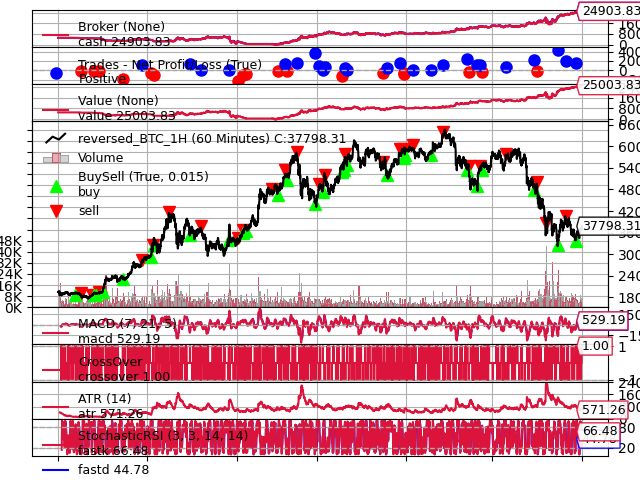

[[<Figure size 640x480 with 9 Axes>]]

In [351]:
cerebro.plot()